In [1]:
#Import data set
import pandas as pd

In [2]:
data = pd.read_csv("C:/Users/91976/Downloads/Salary_Data.csv")

In [3]:
#EDA
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data.shape

(30, 2)

In [5]:
data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [7]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [9]:
import matplotlib.pyplot as plt

(array([4., 2., 5., 4., 3., 2., 2., 2., 3., 3.]),
 array([ 1.1 ,  2.04,  2.98,  3.92,  4.86,  5.8 ,  6.74,  7.68,  8.62,
         9.56, 10.5 ]),
 <BarContainer object of 10 artists>)

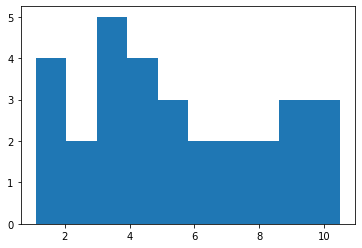

In [10]:
plt.hist(data.YearsExperience)

{'whiskers': [<matplotlib.lines.Line2D at 0x1453f12dbe0>,
 'caps': [<matplotlib.lines.Line2D at 0x1453f13b2e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1453f12d8e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1453f13b9a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1453f13bd00>],
 'means': []}

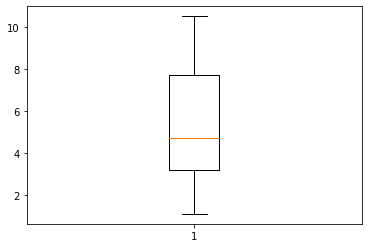

In [11]:
plt.boxplot(data.YearsExperience)

(array([4., 2., 7., 4., 0., 2., 2., 2., 4., 3.]),
 array([ 37731.,  46197.,  54663.,  63129.,  71595.,  80061.,  88527.,
         96993., 105459., 113925., 122391.]),
 <BarContainer object of 10 artists>)

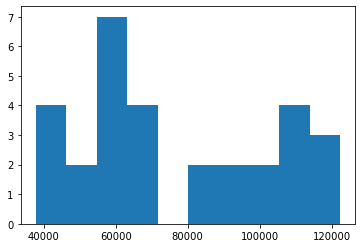

In [12]:
plt.hist(data.Salary)

{'whiskers': [<matplotlib.lines.Line2D at 0x1453f208af0>,
 'caps': [<matplotlib.lines.Line2D at 0x1453f2141f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1453f208790>],
 'medians': [<matplotlib.lines.Line2D at 0x1453f2148b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1453f214c10>],
 'means': []}

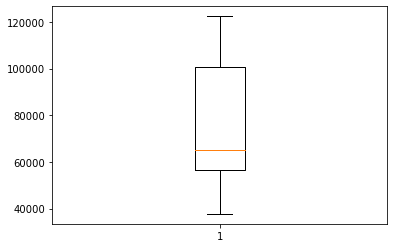

In [13]:
plt.boxplot(data.Salary)

Text(0, 0.5, 'Experience in years')

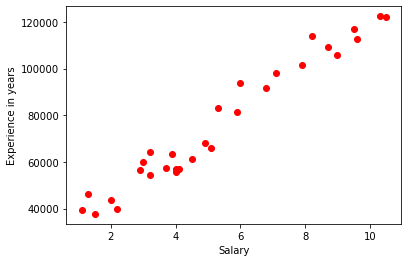

In [17]:
plt.plot(data.YearsExperience, data.Salary, "ro")
plt.xlabel('Salary')
plt.ylabel('Experience in years')

In [18]:
import seaborn as sns

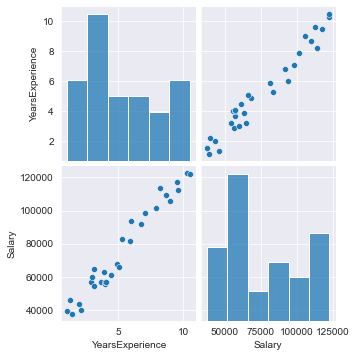

In [19]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

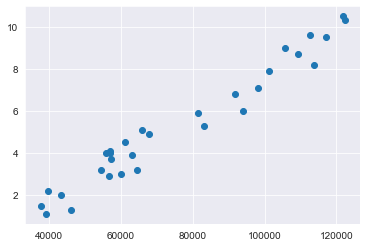

In [20]:
plt.scatter(data.Salary, data.YearsExperience)

In [21]:
#Correlation
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\Users\91976\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

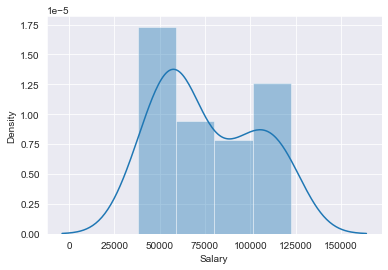

In [22]:
sns.distplot(data.Salary)

C:\Users\91976\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

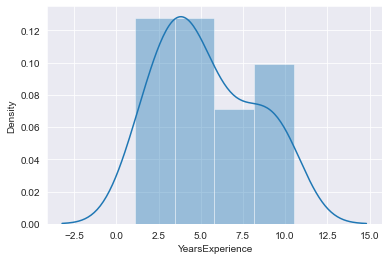

In [23]:
sns.distplot(data['YearsExperience'])

In [24]:
import statsmodels.formula.api as smf
model = smf.ols("Salary~YearsExperience", data=data).fit()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

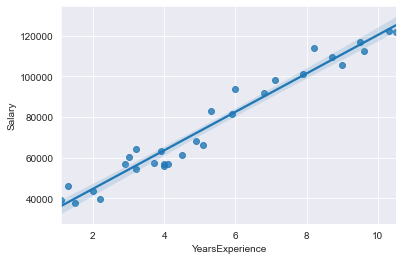

In [25]:
sns.regplot(x= 'YearsExperience', y= 'Salary', data=data)

In [26]:
#Coefficients
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [27]:
#t and p-values
print(model.tvalues, '\n', model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [28]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           1.14e-20
Time:                        17:53:19   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
pred = model.predict(data)

In [31]:
pred.corr(data.Salary)

0.9782416184887601

In [32]:
pred.head()

0    36187.158752
1    38077.151217
2    39967.143681
3    44692.124842
4    46582.117306
dtype: float64

Text(0, 0.5, 'Experience in years')

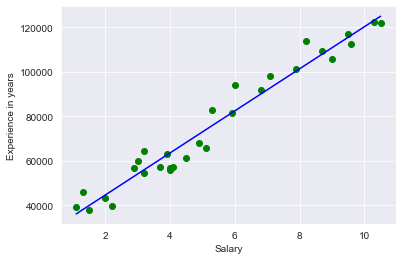

In [33]:
plt.scatter(x = data['YearsExperience'], y = data['Salary'], color = 'green')
plt.plot(data['YearsExperience'], pred, color = 'blue')
plt.xlabel('Salary')
plt.ylabel('Experience in years')

In [34]:
#Building model by using logarithmic transformed data
import numpy as np
model1 = smf.ols('Salary~np.log(YearsExperience)', data = data).fit()

In [35]:
model1.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [36]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           3.25e-13
Time:                        17:59:15   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
pred1 = model1.predict(data)

In [38]:
pred1.corr(data.Salary)

0.9240610817882641

In [39]:
pred1.head()

0    18795.848339
1    25575.235192
2    31382.551905
3    43057.262306
4    46925.138875
dtype: float64

Text(0, 0.5, 'Salary')

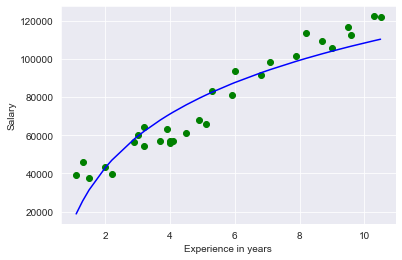

In [40]:
plt.scatter(x = data['YearsExperience'], y = data['Salary'], color = 'green')
plt.plot(data['YearsExperience'], pred1, color = 'blue')
plt.xlabel('Experience in years')
plt.ylabel('Salary')

In [43]:
# Building a model on exponential transformed data
model2 = smf.ols('np.log(Salary)~YearsExperience', data = data).fit()

In [44]:
model2.params

Intercept          10.507402
YearsExperience     0.125453
dtype: float64

In [45]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           7.03e-18
Time:                        18:03:38   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
pred2 = model2.predict(data)

In [47]:
pred2.corr(data.Salary)

0.9782416184887601

In [48]:
pred2.head()

0    10.645400
1    10.670491
2    10.695581
3    10.758308
4    10.783398
dtype: float64

In [50]:
pred2 = np.exp(pred2)

In [52]:
pred2.head()

0    41998.957468
1    43066.066794
2    44160.289228
3    47019.029189
4    48213.688474
dtype: float64

C:\Users\91976\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Salary')

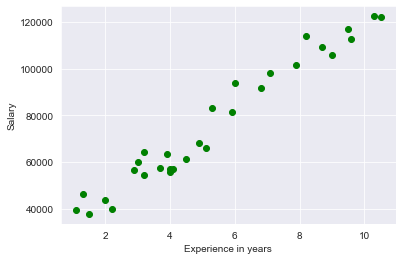

In [53]:
plt.scatter(x = data['YearsExperience'], y = data['Salary'], color = 'green')
plt.plot(data['YearsExperience'], np.exp(pred2), color = 'blue')
plt.xlabel('Experience in years')
plt.ylabel('Salary')

***So we will consider the model having the highest R-squared value which is the model without any transformation that is model***